# 1. Importing Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression,Lasso,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.decomposition import PCA

# 2. Importing dataset

In [4]:
df = pd.read_csv('ElectionData.csv')
df.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


### Getting file summary of dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TimeElapsed               21643 non-null  int64  
 1   time                      21643 non-null  object 
 2   territoryName             21643 non-null  object 
 3   totalMandates             21643 non-null  int64  
 4   availableMandates         21643 non-null  int64  
 5   numParishes               21643 non-null  int64  
 6   numParishesApproved       21643 non-null  int64  
 7   blankVotes                21643 non-null  int64  
 8   blankVotesPercentage      21643 non-null  float64
 9   nullVotes                 21643 non-null  int64  
 10  nullVotesPercentage       21643 non-null  float64
 11  votersPercentage          21643 non-null  float64
 12  subscribedVoters          21643 non-null  int64  
 13  totalVoters               21643 non-null  int64  
 14  pre.bl

### Check for missing values

In [6]:
df.isna().sum()

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

No missing values are present in the dataset so we can proceed further.

### Checking file description of dataset

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TimeElapsed,21643.0,133.146052,7.765119e+01,0.00,65.00,135.00,200.00,265.00
totalMandates,21643.0,11.544795,3.131457e+01,0.00,1.00,4.00,9.00,226.00
availableMandates,21643.0,11.499284,3.173878e+01,0.00,0.00,3.00,9.00,226.00
numParishes,21643.0,309.956013,6.590559e+02,54.00,75.00,147.00,242.00,3092.00
numParishesApproved,21643.0,261.090237,5.833774e+02,3.00,67.00,120.00,208.00,3092.00
blankVotes,21643.0,8875.066673,2.148487e+04,19.00,1188.00,2998.00,6889.00,129599.00
blankVotesPercentage,21643.0,2.621629,7.952894e-01,0.53,2.23,2.64,2.98,5.46
nullVotes,21643.0,6148.068752,1.473547e+04,39.00,1094.00,2232.00,4121.00,88539.00
nullVotesPercentage,21643.0,1.961471,3.752501e-01,1.34,1.72,1.87,2.23,3.35
votersPercentage,21643.0,51.983722,4.854380e+00,35.98,50.29,53.13,54.55,59.87


### Checking datatypes of dataset

In [8]:
df.dtypes

TimeElapsed                   int64
time                         object
territoryName                object
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                        object
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates               

### Changing the data to datetime format. making seperate column for date

In [9]:
df['Date'] = pd.to_datetime(df['time']).dt.date
df['time'] = pd.to_datetime(df['time']).dt.time
df.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,Date
0,0,20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,813743,428546,PS,0,38.29,40.22,147993,94,106,2019-10-06
1,0,20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77,2019-10-06
2,0,20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,813743,428546,B.E.,0,6.81,7.15,26307,16,19,2019-10-06
3,0,20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5,2019-10-06
4,0,20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12,2019-10-06


# 3. EDA 

### Data vislization

In [10]:
# finding the unique party names
df.Party.value_counts()

PS           1127
PCTP/MRPP    1127
PNR          1127
PDR          1127
IL           1127
PPD/PSD      1127
A            1127
L            1127
CH           1127
PAN          1127
PCP-PEV      1127
CDS-PP       1127
B.E.         1127
PPM          1073
R.I.R.       1026
MPT          1019
PTP          1019
NC            972
PURP          972
JPP           486
MAS           425
Name: Party, dtype: int64

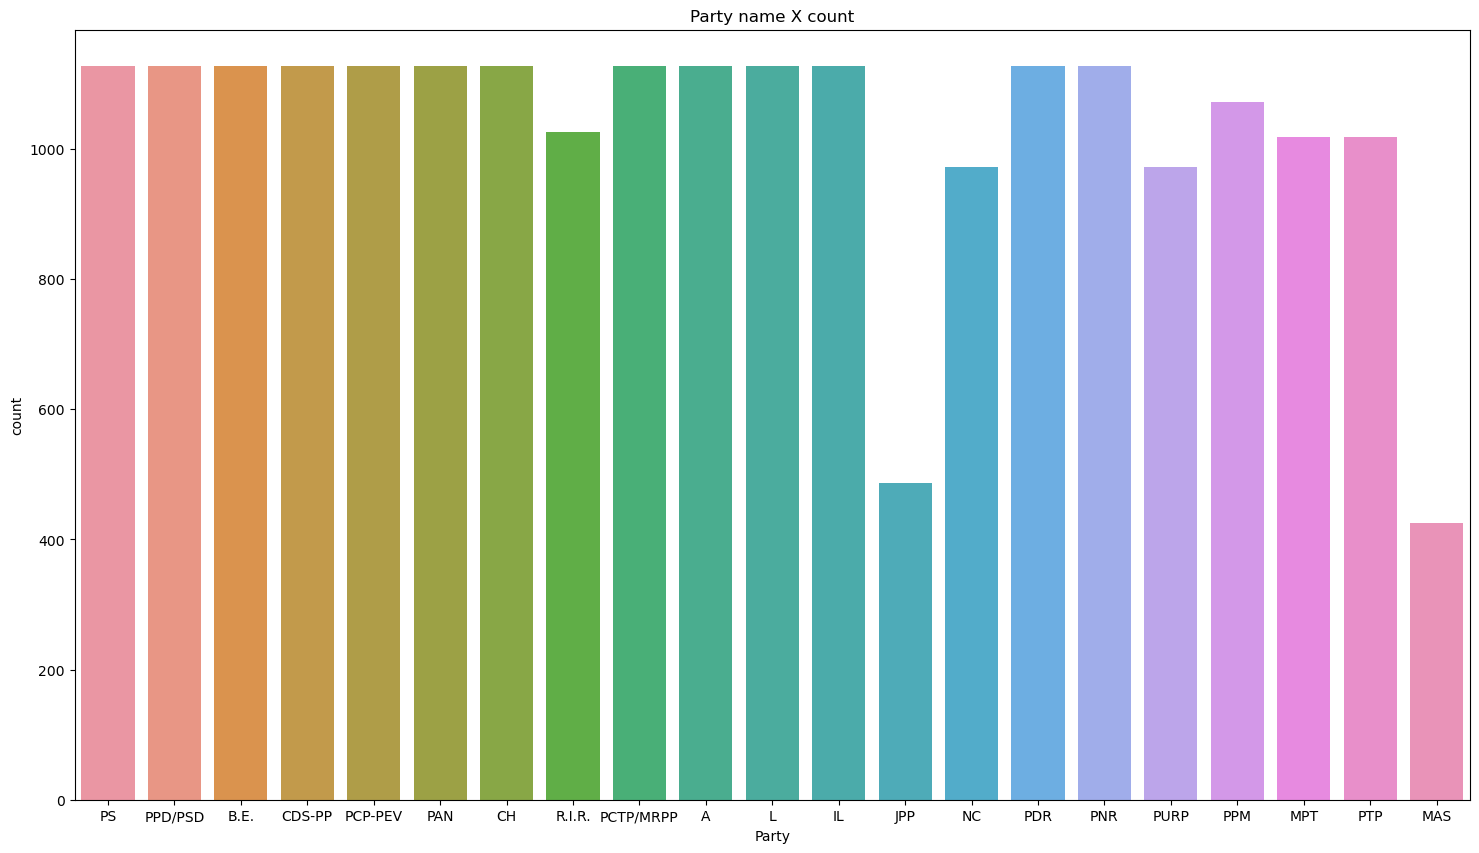

In [11]:
plt.figure(figsize=(18,10))
sns.countplot(data=df,x='Party')
plt.title('Party name X count')
plt.show()

The `JPP` and `MAS` party has less count.

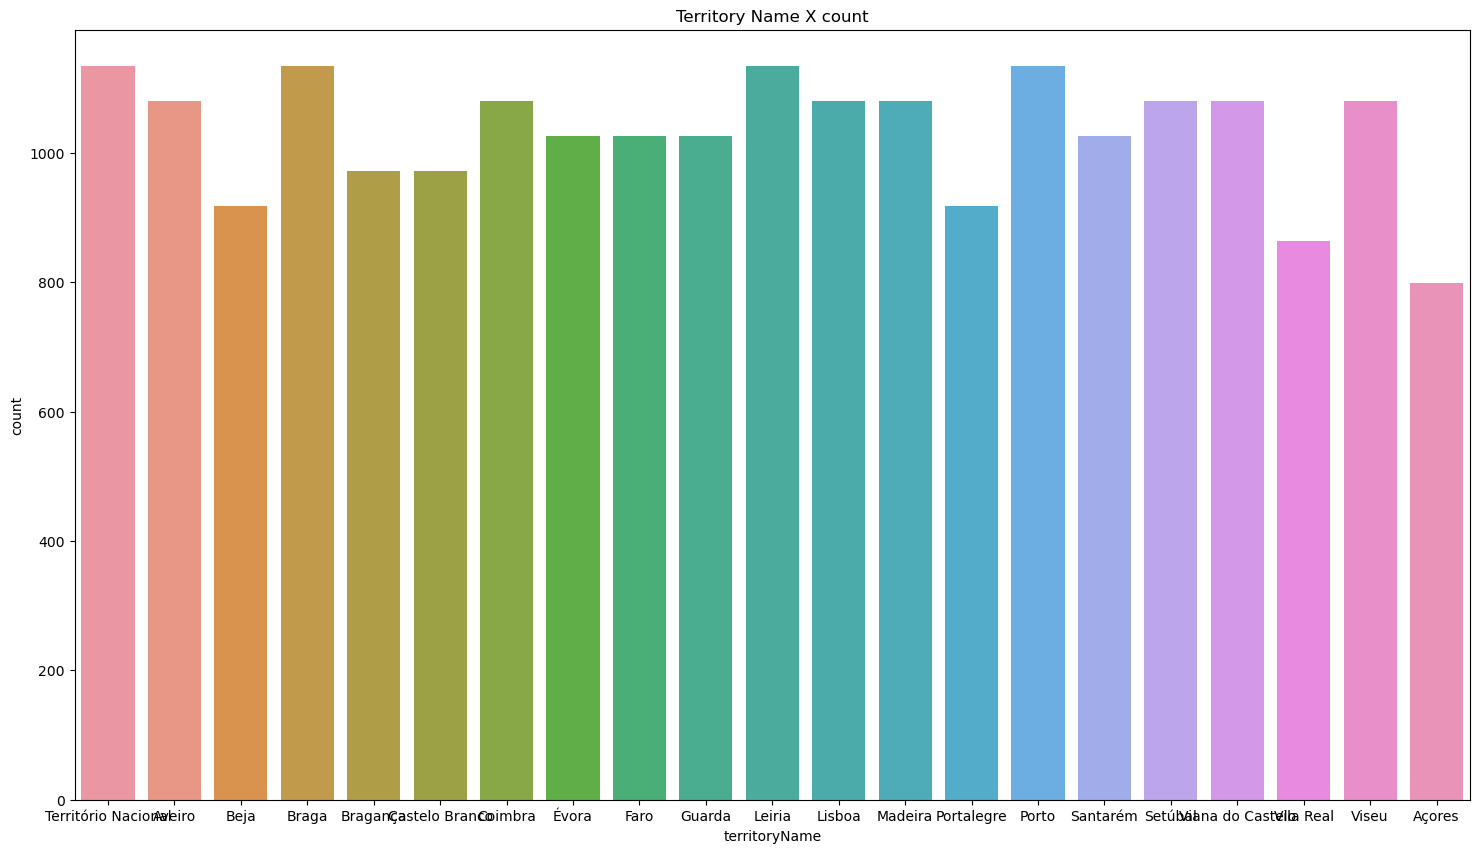

In [12]:
plt.figure(figsize=(18,10))
sns.countplot(data=df,x='territoryName')
plt.title('Territory Name X count')
plt.show()

Most of the territories has count ranges from 800-1000.

<AxesSubplot:>

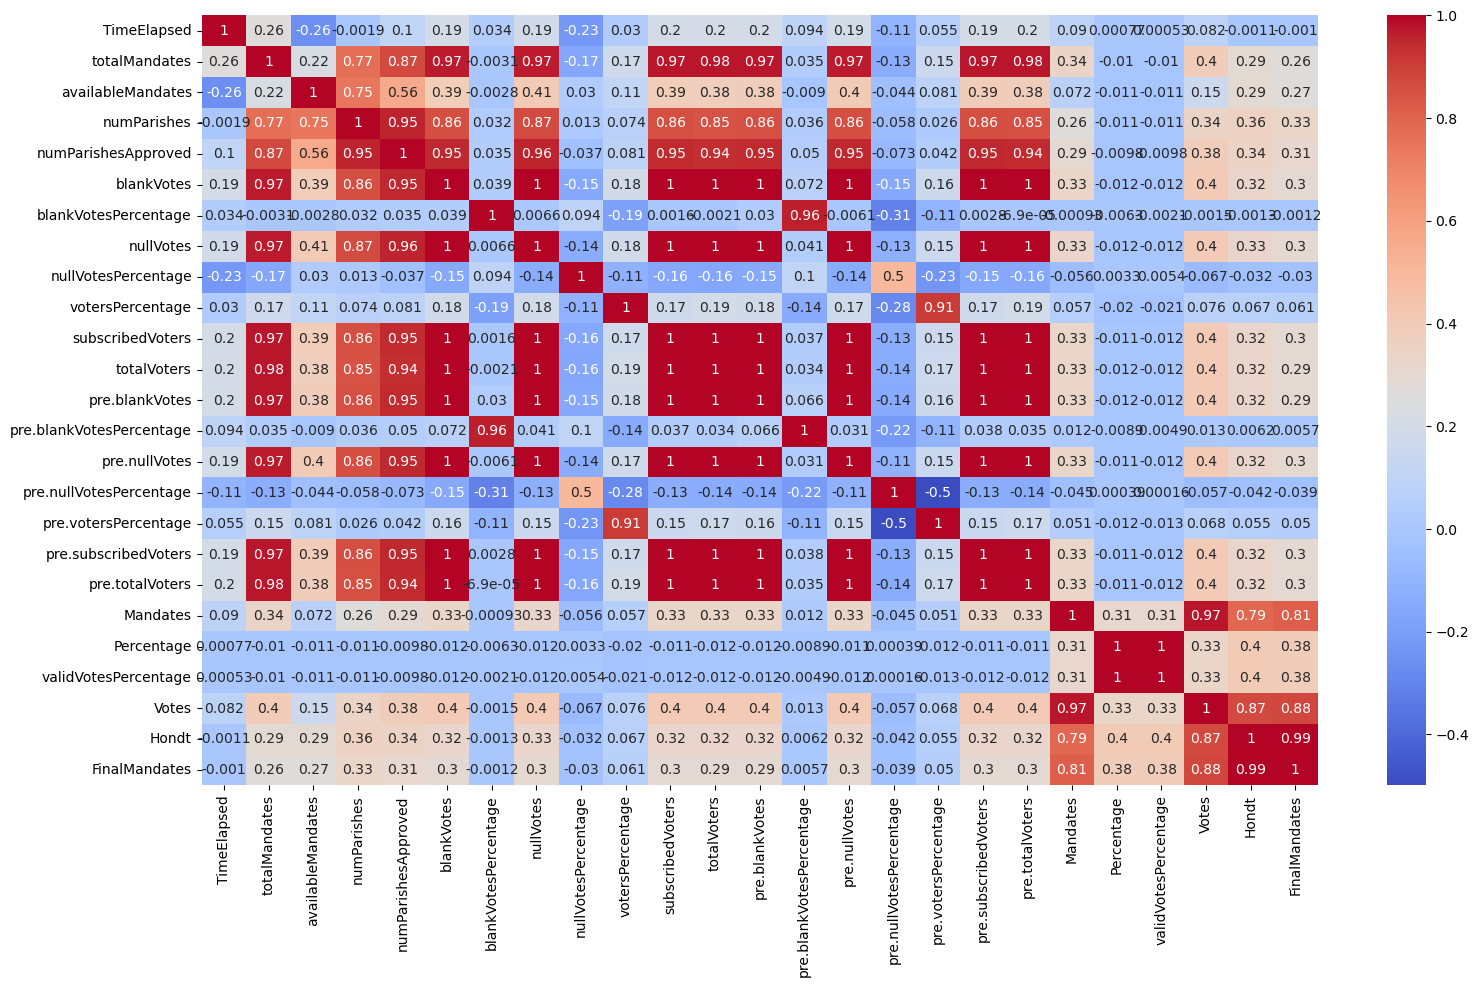

In [13]:
# Checking the corelation
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

### Observations
1. From above we clearly see that some of the variable has high corelation > 0.85.

### Bivariate analysis

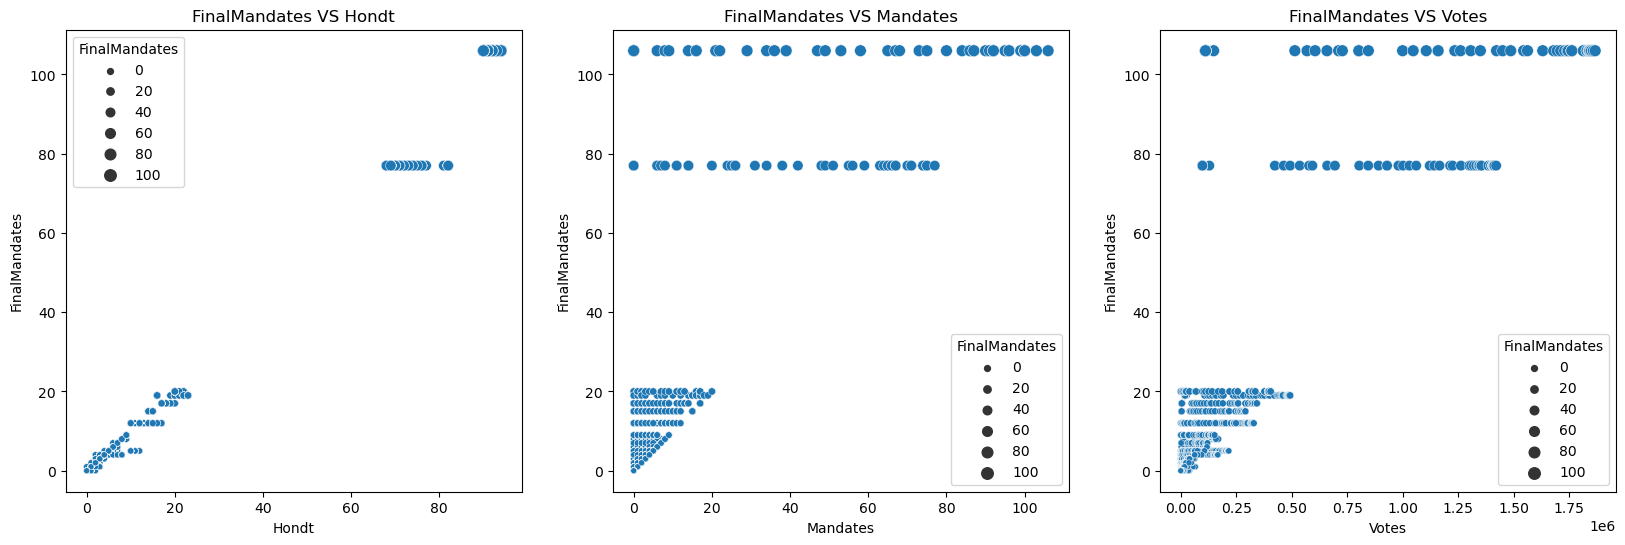

In [14]:
# Plotting the diffrent variable against target variable 
cols = ['Hondt','Mandates','Votes']

fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(20,6))
for i in range(0,len(cols)):
    axes[i] = sns.scatterplot(data=df,x=cols[i],y='FinalMandates',size='FinalMandates',ax=axes[i])
    axes[i].set_title('FinalMandates VS '+cols[i])

### Observations
1. Hondt - Linearly corelated with target variable.
2. Mandates - Discrete and positively corelated with target variable.
3. Votes - Discrete relationship with target variable.

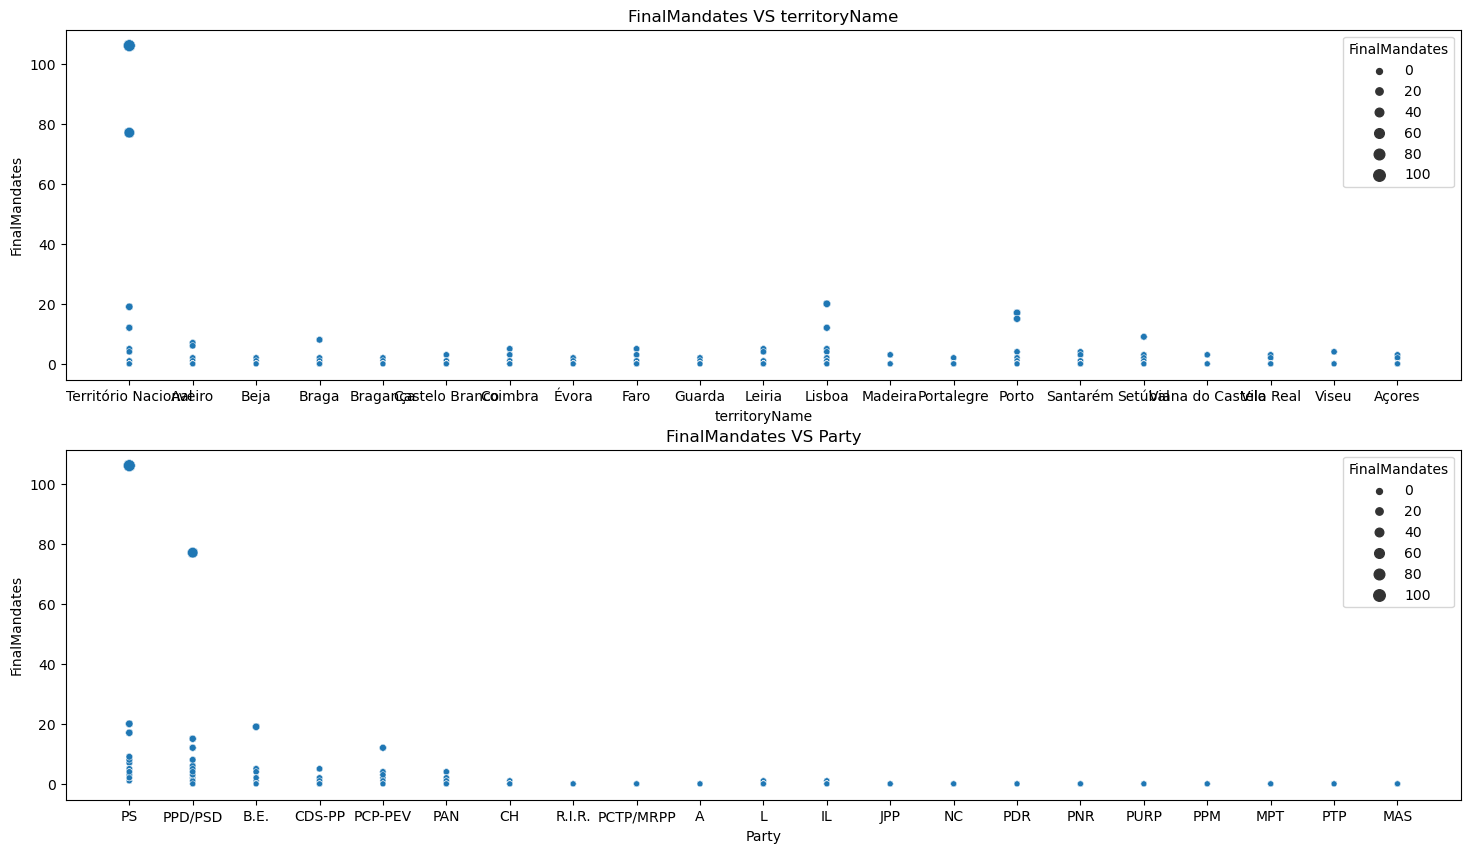

In [15]:
cols = ['territoryName','Party']

fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(18,10))
for i in range(len(cols)):
    axes[i] = sns.scatterplot(data=df,x=cols[i],y='FinalMandates',size='FinalMandates',ax=axes[i])
    axes[i].set_title('FinalMandates VS '+cols[i])

### Observations
1. Territoryname - We can see that outliers are present in the dataset and some territoryhas lesser values.
2. Party - In this also outliers are also present  and some of the partys has very less count of final mandates.

### PCA analysis

In [16]:
df.columns

Index(['TimeElapsed', 'time', 'territoryName', 'totalMandates',
       'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates', 'Date'],
      dtype='object')

In [17]:
col_1 = ['totalMandates','availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes','nullVotes', 
         'subscribedVoters', 'totalVoters', 'pre.blankVotes', 'pre.nullVotes', 'pre.subscribedVoters', 
         'pre.totalVoters', 'Percentage', 'validVotesPercentage']
col_2 = ['Mandates','Votes','Hondt']

In [18]:
# Now do the scaling using standard scaler
sc= StandardScaler()

In [19]:
df1 = df[col_1]
df2 = df[col_2]

In [20]:
a = sc.fit_transform(df1)
df_1 = pd.DataFrame(a,columns=df1.columns)
df_1[:5]

,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,nullVotes,subscribedVoters,totalVoters,pre.blankVotes,pre.nullVotes,pre.subscribedVoters,pre.totalVoters,Percentage,validVotesPercentage
0,-0.36868,6.758472,4.221354,1.405486,0.036163,0.184995,0.081932,0.057204,0.038339,0.158501,0.113892,0.078796,3.210250,3.217832
1,-0.36868,6.758472,4.221354,1.405486,0.036163,0.184995,0.081932,0.057204,0.038339,0.158501,0.113892,0.078796,2.727578,2.733495
2,-0.36868,6.758472,4.221354,1.405486,0.036163,0.184995,0.081932,0.057204,0.038339,0.158501,0.113892,0.078796,0.177415,0.178549
3,-0.36868,6.758472,4.221354,1.405486,0.036163,0.184995,0.081932,0.057204,0.038339,0.158501,0.113892,0.078796,-0.006598,-0.006179
4,-0.36868,6.758472,4.221354,1.405486,0.036163,0.184995,0.081932,0.057204,0.038339,0.158501,0.113892,0.078796,-0.036464,-0.034669


In [21]:
b = sc.fit_transform(df2)
df_2 = pd.DataFrame(b,columns=df2.columns)
df_2[:5]

,Mandates,Votes,Hondt
0,-0.127891,1.419284,14.757327
1,-0.127891,1.211248,12.691673
2,-0.127891,0.112293,2.363404
3,-0.127891,0.032984,1.727818
4,-0.127891,0.020460,1.568922


In [22]:
# Principal component analysis
pca = PCA(n_components=1)

In [23]:
new_var1 = pca.fit_transform(df_1)
new_var2 = pca.fit_transform(df_2)

In [24]:
# Now updating dataframe
df_new = pd.concat((df,pd.DataFrame(new_var1)),axis=1)
df_new[:5]

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,Date,0
0,0,20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,428546,PS,0,38.29,40.22,147993,94,106,2019-10-06,2.613564
1,0,20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,428546,PPD/PSD,0,33.28,34.95,128624,81,77,2019-10-06,2.617796
2,0,20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,428546,B.E.,0,6.81,7.15,26307,16,19,2019-10-06,2.640136
3,0,20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,428546,CDS-PP,0,4.90,5.14,18923,12,5,2019-10-06,2.641750
4,0,20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,428546,PCP-PEV,0,4.59,4.83,17757,11,12,2019-10-06,2.642005


In [25]:
df_new.rename({0:'PCA_1'},axis=1,inplace=True)
df_new.drop(col_1,axis=1,inplace=True)
df_new[:5]

,TimeElapsed,time,territoryName,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.blankVotesPercentage,pre.nullVotesPercentage,pre.votersPercentage,Party,Mandates,Votes,Hondt,FinalMandates,Date,PCA_1
0,0,20:10:02,Território Nacional,2.5,2.3,51.36,1.94,1.91,52.66,PS,0,147993,94,106,2019-10-06,2.613564
1,0,20:10:02,Território Nacional,2.5,2.3,51.36,1.94,1.91,52.66,PPD/PSD,0,128624,81,77,2019-10-06,2.617796
2,0,20:10:02,Território Nacional,2.5,2.3,51.36,1.94,1.91,52.66,B.E.,0,26307,16,19,2019-10-06,2.640136
3,0,20:10:02,Território Nacional,2.5,2.3,51.36,1.94,1.91,52.66,CDS-PP,0,18923,12,5,2019-10-06,2.641750
4,0,20:10:02,Território Nacional,2.5,2.3,51.36,1.94,1.91,52.66,PCP-PEV,0,17757,11,12,2019-10-06,2.642005


In [26]:
df_new = pd.concat((df_new,pd.DataFrame(new_var2)),axis=1)
df_new[:5]

,TimeElapsed,time,territoryName,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.blankVotesPercentage,pre.nullVotesPercentage,pre.votersPercentage,Party,Mandates,Votes,Hondt,FinalMandates,Date,PCA_1,0
0,0,20:10:02,Território Nacional,2.5,2.3,51.36,1.94,1.91,52.66,PS,0,147993,94,106,2019-10-06,2.613564,8.978608
1,0,20:10:02,Território Nacional,2.5,2.3,51.36,1.94,1.91,52.66,PPD/PSD,0,128624,81,77,2019-10-06,2.617796,7.705872
2,0,20:10:02,Território Nacional,2.5,2.3,51.36,1.94,1.91,52.66,B.E.,0,26307,16,19,2019-10-06,2.640136,1.307178
3,0,20:10:02,Território Nacional,2.5,2.3,51.36,1.94,1.91,52.66,CDS-PP,0,18923,12,5,2019-10-06,2.641750,0.906452
4,0,20:10:02,Território Nacional,2.5,2.3,51.36,1.94,1.91,52.66,PCP-PEV,0,17757,11,12,2019-10-06,2.642005,0.810622


In [27]:
df_new.rename({0:'PCA_2'},axis=1,inplace=True)
df_new.drop(col_2,axis=1,inplace=True)
df_new.head()

,TimeElapsed,time,territoryName,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.blankVotesPercentage,pre.nullVotesPercentage,pre.votersPercentage,Party,FinalMandates,Date,PCA_1,PCA_2
0,0,20:10:02,Território Nacional,2.5,2.3,51.36,1.94,1.91,52.66,PS,106,2019-10-06,2.613564,8.978608
1,0,20:10:02,Território Nacional,2.5,2.3,51.36,1.94,1.91,52.66,PPD/PSD,77,2019-10-06,2.617796,7.705872
2,0,20:10:02,Território Nacional,2.5,2.3,51.36,1.94,1.91,52.66,B.E.,19,2019-10-06,2.640136,1.307178
3,0,20:10:02,Território Nacional,2.5,2.3,51.36,1.94,1.91,52.66,CDS-PP,5,2019-10-06,2.641750,0.906452
4,0,20:10:02,Território Nacional,2.5,2.3,51.36,1.94,1.91,52.66,PCP-PEV,12,2019-10-06,2.642005,0.810622


### Label encoding of categorical variable

In [28]:
cat_col = []
for i in df_new.columns:
    if df_new[i].dtypes == 'O':
        cat_col.append(i)
cat_col

['time', 'territoryName', 'Party', 'Date']

In [29]:
le = LabelEncoder()

In [30]:
for i in cat_col:
    df_new[i] = pd.DataFrame(le.fit_transform(df_new[i]))
df_new.head()

,TimeElapsed,time,territoryName,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.blankVotesPercentage,pre.nullVotesPercentage,pre.votersPercentage,Party,FinalMandates,Date,PCA_1,PCA_2
0,0,8,16,2.5,2.3,51.36,1.94,1.91,52.66,17,106,0,2.613564,8.978608
1,0,8,16,2.5,2.3,51.36,1.94,1.91,52.66,15,77,0,2.617796,7.705872
2,0,8,16,2.5,2.3,51.36,1.94,1.91,52.66,1,19,0,2.640136,1.307178
3,0,8,16,2.5,2.3,51.36,1.94,1.91,52.66,2,5,0,2.641750,0.906452
4,0,8,16,2.5,2.3,51.36,1.94,1.91,52.66,11,12,0,2.642005,0.810622


### Removing Outlier

TimeElapsed                    AxesSubplot(0.125,0.747241;0.133621x0.132759)
time                        AxesSubplot(0.285345,0.747241;0.133621x0.132759)
territoryName                AxesSubplot(0.44569,0.747241;0.133621x0.132759)
blankVotesPercentage        AxesSubplot(0.606034,0.747241;0.133621x0.132759)
nullVotesPercentage         AxesSubplot(0.766379,0.747241;0.133621x0.132759)
votersPercentage               AxesSubplot(0.125,0.587931;0.133621x0.132759)
pre.blankVotesPercentage    AxesSubplot(0.285345,0.587931;0.133621x0.132759)
pre.nullVotesPercentage      AxesSubplot(0.44569,0.587931;0.133621x0.132759)
pre.votersPercentage        AxesSubplot(0.606034,0.587931;0.133621x0.132759)
Party                       AxesSubplot(0.766379,0.587931;0.133621x0.132759)
FinalMandates                  AxesSubplot(0.125,0.428621;0.133621x0.132759)
Date                        AxesSubplot(0.285345,0.428621;0.133621x0.132759)
PCA_1                        AxesSubplot(0.44569,0.428621;0.133621x0.132759)

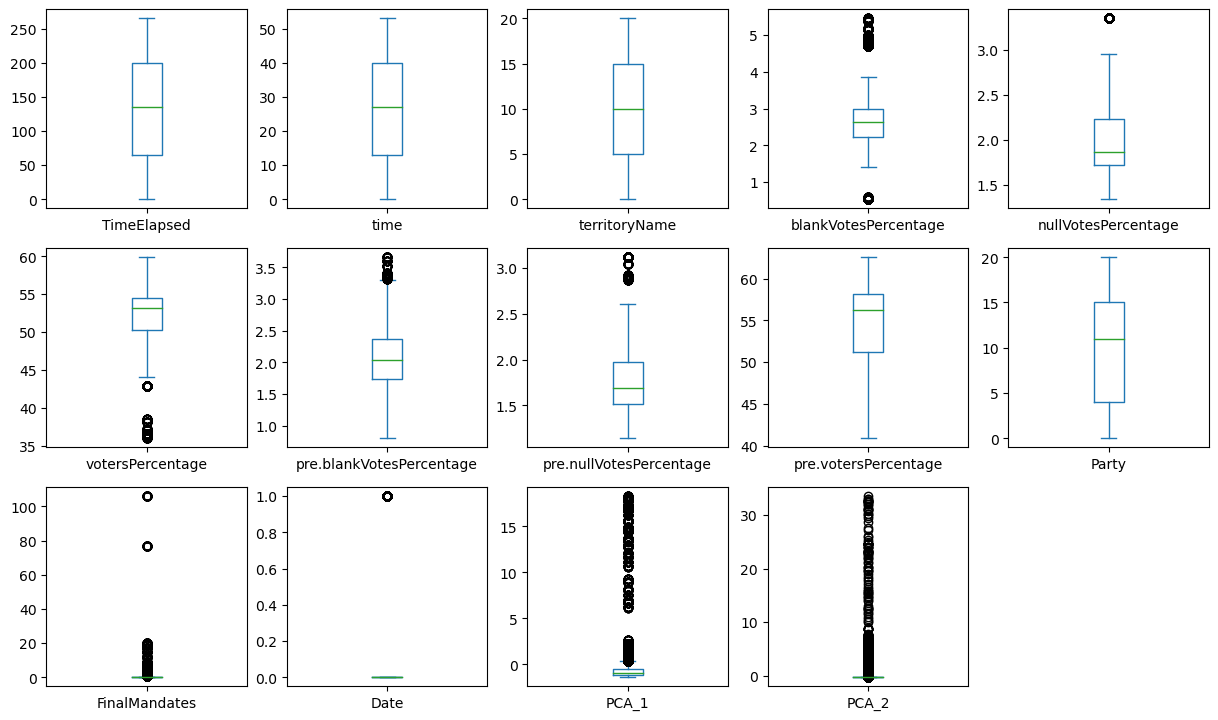

In [31]:
# Now will chek for outlier using box plot
df_new.plot(kind='box',subplots=True,layout=(5,5),figsize=(15,15))

In [32]:
z = np.abs(zscore(df_new))

In [33]:
threshold = 3
print(np.where(z<3))

(array([    0,     0,     0, ..., 21642, 21642, 21642], dtype=int64), array([ 0,  1,  2, ..., 11, 12, 13], dtype=int64))


In [34]:
#Assign the value to df_new which are less the threshold value and removing the outliers
filtered_entries = (z<3).all(axis=1)
df_new_1 = df_new[filtered_entries]

In [35]:
print(df_new.shape)
print(df_new_1.shape)

(21643, 14)
(19629, 14)


In [36]:
df_new_1.tail()

,TimeElapsed,time,territoryName,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.blankVotesPercentage,pre.nullVotesPercentage,pre.votersPercentage,Party,FinalMandates,Date,PCA_1,PCA_2
21638,265,7,19,2.81,2.08,51.04,2.22,1.9,51.28,9,0,1,-0.519118,-0.272936
21639,265,7,19,2.81,2.08,51.04,2.22,1.9,51.28,14,0,1,-0.519110,-0.272975
21640,265,7,19,2.81,2.08,51.04,2.22,1.9,51.28,8,0,1,-0.519077,-0.273423
21641,265,7,19,2.81,2.08,51.04,2.22,1.9,51.28,18,0,1,-0.519069,-0.273532
21642,265,7,19,2.81,2.08,51.04,2.22,1.9,51.28,5,0,1,-0.519015,-0.274306


In [37]:
df = df_new_1

TimeElapsed                    AxesSubplot(0.125,0.653529;0.133621x0.226471)
time                        AxesSubplot(0.285345,0.653529;0.133621x0.226471)
territoryName                AxesSubplot(0.44569,0.653529;0.133621x0.226471)
blankVotesPercentage        AxesSubplot(0.606034,0.653529;0.133621x0.226471)
nullVotesPercentage         AxesSubplot(0.766379,0.653529;0.133621x0.226471)
votersPercentage               AxesSubplot(0.125,0.381765;0.133621x0.226471)
pre.blankVotesPercentage    AxesSubplot(0.285345,0.381765;0.133621x0.226471)
pre.nullVotesPercentage      AxesSubplot(0.44569,0.381765;0.133621x0.226471)
pre.votersPercentage        AxesSubplot(0.606034,0.381765;0.133621x0.226471)
Party                       AxesSubplot(0.766379,0.381765;0.133621x0.226471)
FinalMandates                      AxesSubplot(0.125,0.11;0.133621x0.226471)
Date                            AxesSubplot(0.285345,0.11;0.133621x0.226471)
PCA_1                            AxesSubplot(0.44569,0.11;0.133621x0.226471)

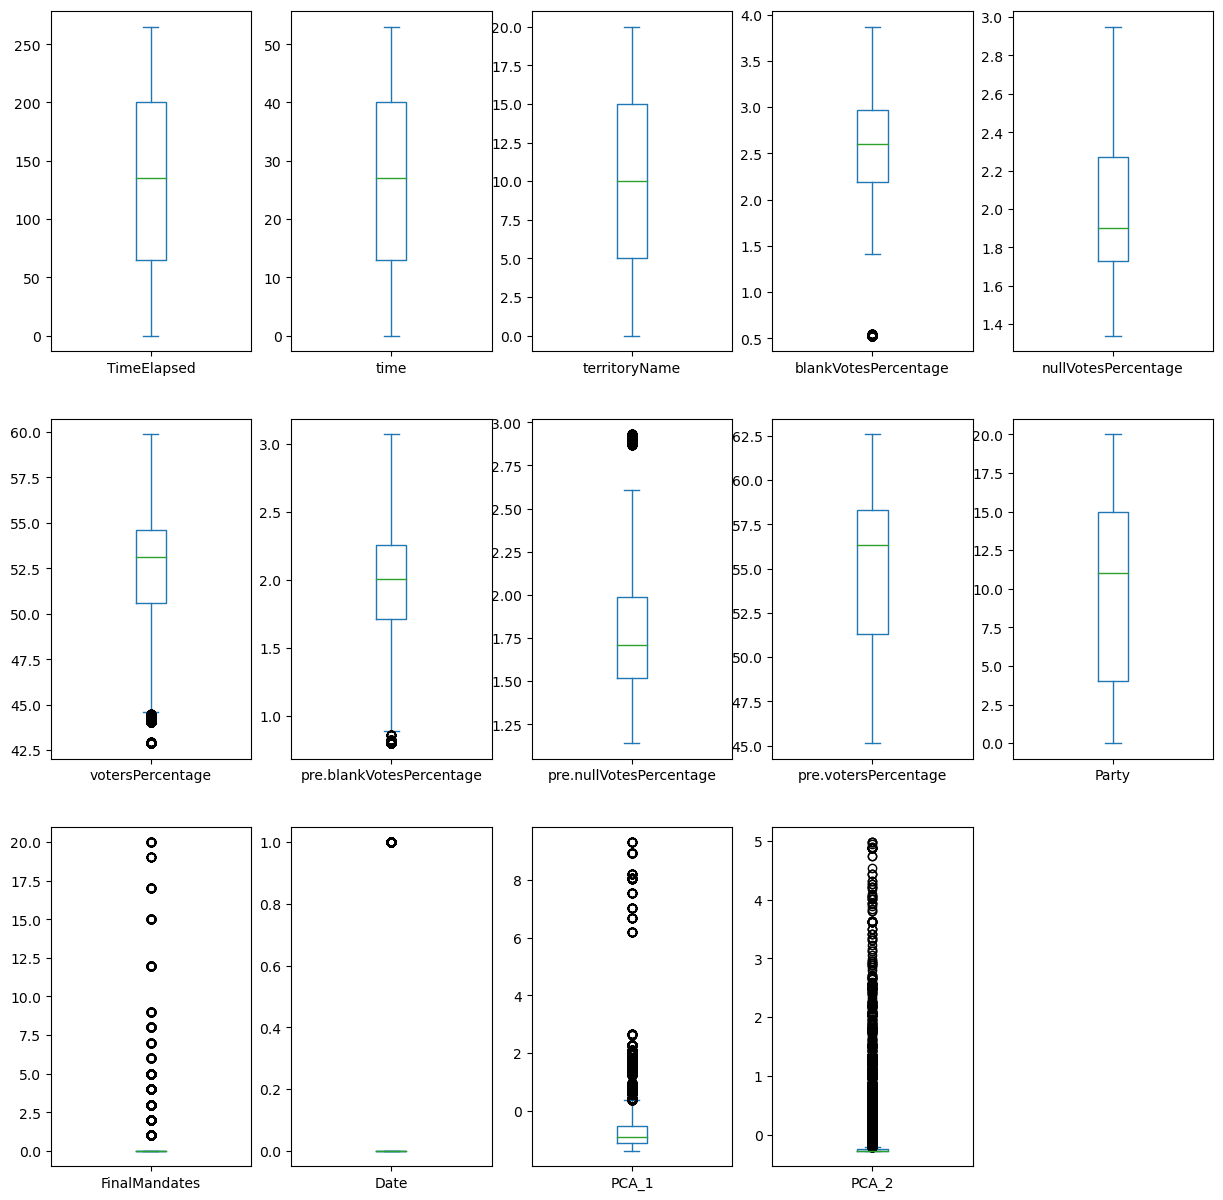

In [38]:
# Now again check for outliers
df.plot(kind='box',subplots=True,layout=(3,5),figsize=(15,15))

array([[<AxesSubplot:title={'center':'TimeElapsed'}>,
        <AxesSubplot:title={'center':'time'}>,
        <AxesSubplot:title={'center':'territoryName'}>,
        <AxesSubplot:title={'center':'blankVotesPercentage'}>],
       [<AxesSubplot:title={'center':'nullVotesPercentage'}>,
        <AxesSubplot:title={'center':'votersPercentage'}>,
        <AxesSubplot:title={'center':'pre.blankVotesPercentage'}>,
        <AxesSubplot:title={'center':'pre.nullVotesPercentage'}>],
       [<AxesSubplot:title={'center':'pre.votersPercentage'}>,
        <AxesSubplot:title={'center':'Party'}>,
        <AxesSubplot:title={'center':'FinalMandates'}>,
        <AxesSubplot:title={'center':'Date'}>],
       [<AxesSubplot:title={'center':'PCA_1'}>,
        <AxesSubplot:title={'center':'PCA_2'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

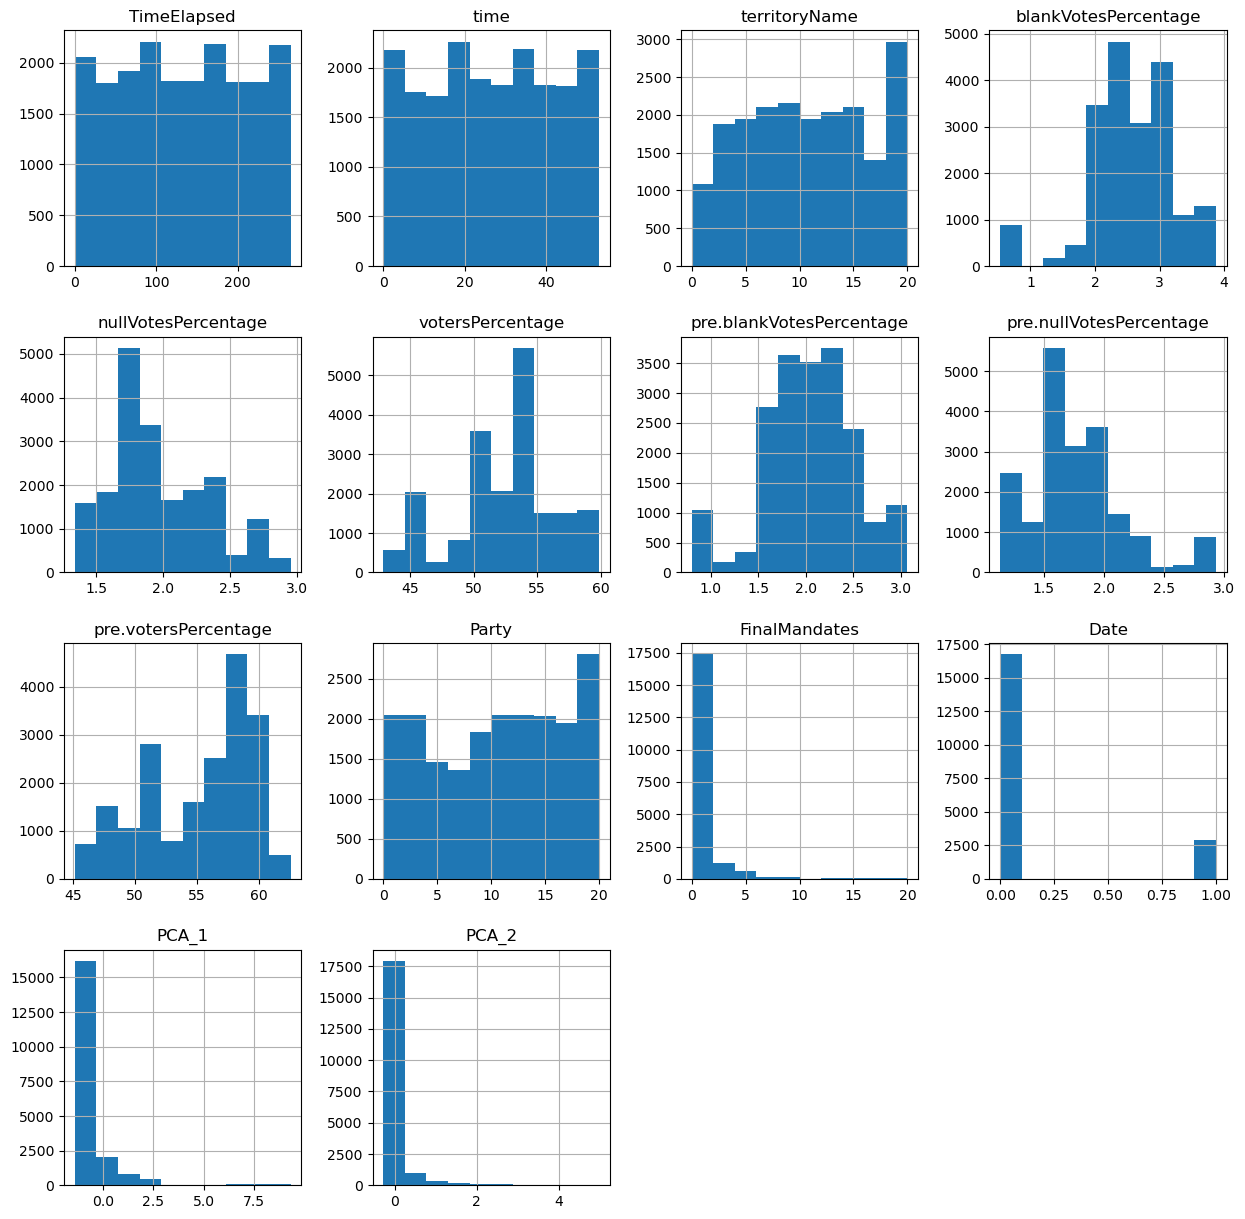

In [39]:
df.hist(figsize=(15,15),layout=(4,4))

# Regression Modeling

### Preparing Dataset

In [40]:
# Create input X
X = df.drop('FinalMandates',axis=1)
X[:5]

,TimeElapsed,time,territoryName,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.blankVotesPercentage,pre.nullVotesPercentage,pre.votersPercentage,Party,Date,PCA_1,PCA_2
2,0,8,16,2.5,2.3,51.36,1.94,1.91,52.66,1,0,2.640136,1.307178
3,0,8,16,2.5,2.3,51.36,1.94,1.91,52.66,2,0,2.641750,0.906452
4,0,8,16,2.5,2.3,51.36,1.94,1.91,52.66,11,0,2.642005,0.810622
5,0,8,16,2.5,2.3,51.36,1.94,1.91,52.66,10,0,2.644401,0.121838
6,0,8,16,2.5,2.3,51.36,1.94,1.91,52.66,3,0,2.645084,-0.074909


In [41]:
# Output
y = df.FinalMandates
y[:5]

2    19
3     5
4    12
5     4
6     1
Name: FinalMandates, dtype: int64

In [42]:
# Standizing the value using standard scaler
sc

StandardScaler()

In [43]:
c = sc.fit_transform(X)
X = pd.DataFrame(c,columns=X.columns)
X[:3]

,TimeElapsed,time,territoryName,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.blankVotesPercentage,pre.nullVotesPercentage,pre.votersPercentage,Party,Date,PCA_1,PCA_2
0,-1.71701,-1.197454,0.975559,-0.075698,0.902556,-0.286813,-0.188404,0.348767,-0.546891,-1.482815,-0.416692,2.997707,3.214694
1,-1.71701,-1.197454,0.975559,-0.075698,0.902556,-0.286813,-0.188404,0.348767,-0.546891,-1.320097,-0.416692,2.999209,2.320347
2,-1.71701,-1.197454,0.975559,-0.075698,0.902556,-0.286813,-0.188404,0.348767,-0.546891,0.144365,-0.416692,2.999446,2.106472


In [44]:
# Spilting the dataset into training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

In [45]:
# finding mse and rmse and other prameters for different model
model = [LinearRegression(),SVR(),Lasso(),KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor()]

for m in model:
    m.fit(X_train,y_train)
    score = m.score(X_train,y_train)
    y_pred = m.predict(X_test)
    print('Training score',m,'is :',score)
    print('MAE :',mean_absolute_error(y_test,y_pred))
    print('MSE :',mean_squared_error(y_test,y_pred))
    print('RMSE :',(np.sqrt(mean_squared_error(y_test,y_pred))))
    print('R2_score :',r2_score(y_test,y_pred))
    print('-'*100)
    print('\n')

Training score LinearRegression() is : 0.8194498910856249
MAE : 0.35330668823850303
MSE : 0.715653253464002
RMSE : 0.8459629149460406
R2_score : 0.8273817251707067
----------------------------------------------------------------------------------------------------


Training score SVR() is : 0.9450658636987741
MAE : 0.13314860175879037
MSE : 0.20595753481190007
RMSE : 0.4538254453111902
R2_score : 0.9503222626666747
----------------------------------------------------------------------------------------------------


Training score Lasso() is : 0.560753767254262
MAE : 0.6033955933787393
MSE : 1.7923822308599888
RMSE : 1.3387988014858652
R2_score : 0.5676706183781861
----------------------------------------------------------------------------------------------------


Training score KNeighborsRegressor() is : 0.9959498027453543
MAE : 0.03715401596196299
MSE : 0.03295635931397521
RMSE : 0.1815388644725289
R2_score : 0.9920508013316551
-----------------------------------------------------

### Observations
1. DeisionTreeRegressorand RandomForestRegressor have good accuracy.
2. Both models are extremely lowe error and high r2score
3. Now we will tune both this model for best parameters.

In [48]:
# we will check rfr and dtr individually
# First will check for RandomForestRegressor
rf = RandomForestRegressor()
parameters = {'n_estimators':[50,100,200,300],'max_depth':[5,6,8,10]}
cv_rf = GridSearchCV(rf,parameters)
cv_rf.fit(X_train,y_train)
cv_rf.best_params_

{'max_depth': 10, 'n_estimators': 50}

In [53]:
rfr = RandomForestRegressor(n_estimators=50,max_depth=10)
rfr.fit(X_train,y_train)
score=rfr.score(X_train,y_train)*100
print('Score of Random Forest regressor is :',score)
y_pred_rfr = rfr.predict(X_test)
print('MAE :',mean_absolute_error(y_test,y_pred_rfr))
print('MSE :',mean_squared_error(y_test,y_pred_rfr))
print('RMSE :',(np.sqrt(mean_squared_error(y_test,y_pred_rfr))))
print('R2 score :',r2_score(y_test,y_pred_rfr))

Score of Random Forest regressor is : 99.89928382493596
MAE : 0.020682803403930944
MSE : 0.016210094663715924
RMSE : 0.1273188700221453
R2 score : 0.9960900637814107


In [54]:
# Now check dtr
dtr = DecisionTreeRegressor()
parameters = {'criterion':['mse'],'max_depth':np.arange(3,15)}
cv_dtr = GridSearchCV(dtr,parameters,cv=5)
cv_dtr.fit(X_train,y_train)
cv_dtr.best_params_

{'criterion': 'mse', 'max_depth': 13}

In [55]:
dt = DecisionTreeRegressor(criterion='mse',max_depth=13)
dt.fit(X_train,y_train)
score=dt.score(X_train,y_train)*100
print('Score of Decistion tree regressor is :',score)
y_pred_dt = dt.predict(X_test)
print('MAE :',mean_absolute_error(y_test,y_pred_dt))
print('MSE :',mean_squared_error(y_test,y_pred_dt))
print('RMSE :',(np.sqrt(mean_squared_error(y_test,y_pred_dt))))
print('R2 score :',r2_score(y_test,y_pred_dt))

Score of Decistion tree regressor is : 99.99696485605277
MAE : 0.010770686267375009
MSE : 0.05581488835982687
RMSE : 0.2362517478450199
R2 score : 0.9865372375632642


### Observations 
1. Since RMSE value for random forest regressor is smaller i.e 0.12 which is smaller than decision tree regressor
2. Final r2 score is .99 whch is greater than the decision tree will select RANDAM Forest model

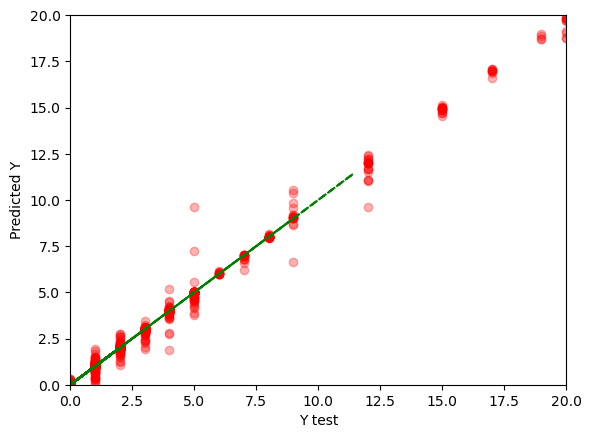

In [66]:
# Plotting our prediction vs test result of random forest regressor
plt.scatter(x=y_test,y=y_pred_rfr,marker='o',color='red',alpha=0.3)
plt.plot(X,X,'g--')
plt.xlim(0,20)
plt.ylim(0,20)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')
plt.show()

# Cross validation

In [69]:
score_cv = cross_val_score(rfr,X,y,cv=10)*100
score_cv

array([99.49319986, 98.59786617, 94.25408476, 98.86969534, 99.47140145,
       99.66729635, 99.65851794, 99.97578336, 99.99889948, 96.25230251])

In [71]:
print('Cross validation score of RandomForest :',np.mean(score_cv))

Cross validation score of RandomForest : 98.62390472242613


### Kfold cross validation

In [75]:
from sklearn.model_selection import StratifiedKFold

In [76]:
skf = StratifiedKFold()

In [77]:
skf

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [78]:
def get_model(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)#training
    return model.score(X_test,y_test)*100

In [81]:
scoreof_rf = []

for train_index,test_index in skf.split(X,y):
    
    scoreof_rf.append(get_model(rfr,X_train,X_test,y_train,y_test))

In [82]:
scoreof_rf

[99.56927191329802,
 99.52455446247464,
 99.59381914192384,
 99.56378223414183,
 99.6454756747646]

In [83]:
print('Startified Kfold score of Random Forest :',np.mean(scoreof_rf))

Startified Kfold score of Random Forest : 99.5793806853206


In [84]:
import pickle

In [85]:
save_model= pickle.dumps(rfr)

In [86]:
filename = 'final_model_election.sav'

In [87]:
pickle.dump(rfr,open(filename,'wb'))

In [88]:
# Load the model from the disk
load_model = pickle.load(open(filename,'rb'))

In [89]:
print(load_model.score(X_test,y_test))

0.9964547567476459
